In [228]:
import pandas as pd ## Preparador de datos
import matplotlib.pyplot as plt ### Visualizador
import missingno as msno ### Para ver valores faltantes
import numpy as np ## Calculos matriciales
import seaborn as sns ### Estilizador y formateador de imagenes
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder


In [229]:
shapefile_path = 'C:\\Users\\JohanStivenPaezBermu\\OneDrive - Asulado\\Python\\Python_MSc\\Tesis\\ESE_Capacidad_Instalada\\ESE_Capacidad_Instalada.shp'
# Carga el Shapefile

Mapa_Antioquia = gpd.read_file(shapefile_path)
Mapa_Antioquia.head(1)

,OBJECTID,COD_MPIO,MPIO_NOMBR,COD_ZONA,COD_SUBREG,REGION,SUBREGION,ZONA,TERRIT_CAR,Shape__Are,Shape__Len,geometry
0,1,05761,SOPETRÁN,Z14,SR06,CORANTIOQUIA,OCCIDENTE,Cauca Medio,Hevexicos,2.190716e+08,93728.01466,"POLYGON ((826004.851 1211021.823, 825864.916 1..."


# CARGA DATOS DE SENSORES Y DATOS PRECIPITACION

In [230]:
df_Sensores = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\Precipitacion_2011_2023_ANT\\Consolidado_Precipitacion_Antioquia.csv")
#df_Sensores.shape ## (67172, 21)
df_Sensores['Fecha'] = pd.to_datetime(df_Sensores['Fecha'])

año_busqueda = 2023
df_Sensores = df_Sensores[df_Sensores['Fecha'].dt.year == año_busqueda]
df_Sensores.head(1).T

,3123
CodigoEstacion,23085270
NombreEstacion,AEROPUERTO J.M. CORDOVA - AUT [23085270]
Latitud,6.168611
Longitud,-75.426111
Altitud,2131
Categoria,Sinóptica Principal
Entidad,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
AreaOperativa,Area Operativa 01 - Antioquia-Chocó
Departamento,Antioquia
Municipio,Rionegro


In [231]:
# COLOCO EL MUNICIPIO Y DEPARTAMENTO EN MAYUSCULA
df_Sensores['Municipio'] = df_Sensores['Municipio'].str.upper()
df_Sensores['Departamento'] = df_Sensores['Departamento'].str.upper()
df_Sensores.head(1).T

,3123
CodigoEstacion,23085270
NombreEstacion,AEROPUERTO J.M. CORDOVA - AUT [23085270]
Latitud,6.168611
Longitud,-75.426111
Altitud,2131
Categoria,Sinóptica Principal
Entidad,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
AreaOperativa,Area Operativa 01 - Antioquia-Chocó
Departamento,ANTIOQUIA
Municipio,RIONEGRO


In [232]:
df_Cod_DANE = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\COD_MUNICIPIOS.csv",encoding='latin1')
#df_Cod_DANE.shape # (1103, 5)
df_Cod_DANE['Municipio'] = df_Cod_DANE['Municipio'].str.upper()
df_Cod_DANE['Departamento'] = df_Cod_DANE['Departamento'].str.upper()
df_Cod_DANE.head(1)

,cod_depto,cod_muni,Departamento,Municipio,cobertura
0,5,1,ANTIOQUIA,MEDELLÍN,77


In [233]:
#df_Cod_DANE['codigo_DANE'] = df_Cod_DANE.apply(lambda row: ''.join(row[['cod_depto', 'cod_muni']]), axis=1)
longitud_municipio = 3
longitud_departamento = 2
df_Cod_DANE['cod_muni'] = df_Cod_DANE['cod_muni'].astype(str)
df_Cod_DANE['cod_muni'] = df_Cod_DANE['cod_muni'].apply(lambda x: x.zfill(longitud_municipio) if len(x) < longitud_municipio else x)

df_Cod_DANE['cod_depto'] = df_Cod_DANE['cod_depto'].astype(str)
df_Cod_DANE['cod_depto'] = df_Cod_DANE['cod_depto'].apply(lambda x: x.zfill(longitud_departamento) if len(x) < longitud_departamento else x)

df_Cod_DANE['codigo_DANE'] = df_Cod_DANE.apply(lambda row: ''.join([str(row['cod_depto']), str(row['cod_muni'])]), axis=1)
df_Cod_DANE.head(1)


,cod_depto,cod_muni,Departamento,Municipio,cobertura,codigo_DANE
0,05,001,ANTIOQUIA,MEDELLÍN,77,05001


In [234]:
df_merge_DANE_SENSOR = pd.merge(df_Cod_DANE, df_Sensores, on='Municipio', how='left')
df_merge_DANE_SENSOR.head(1).T


,0
cod_depto,05
cod_muni,001
Departamento_x,ANTIOQUIA
Municipio,MEDELLÍN
cobertura,77
codigo_DANE,05001
CodigoEstacion,27015330.0
NombreEstacion,OLAYA HERRERA - AUT [27015330]
Latitud,6.224679
Longitud,-75.588225


In [235]:
Sensores_Unicos = df_merge_DANE_SENSOR.drop_duplicates(subset=['codigo_DANE'])##NombreEstacion

Sensores_Unicos.head(1)

,cod_depto,cod_muni,Departamento_x,Municipio,cobertura,codigo_DANE,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento_y,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,05,001,ANTIOQUIA,MEDELLÍN,77,05001,27015330.0,OLAYA HERRERA - AUT [27015330],6.224679,-75.588225,1500.0,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,ANTIOQUIA,12/05/2014 00:00,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,2023-01-01,0.0,50.0,NaN,900.0


In [128]:
# pd.set_option('display.max_rows', None)  # Mostrar todas las filas
# pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

In [236]:
conteo_registros_por_ciudad = Sensores_Unicos['Municipio'].value_counts()

In [237]:
Sensores_Unicos = Sensores_Unicos.rename(columns={'codigo_DANE': 'COD_MPIO'})
Sensores_Unicos.head(1)


,cod_depto,cod_muni,Departamento_x,Municipio,cobertura,COD_MPIO,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento_y,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,05,001,ANTIOQUIA,MEDELLÍN,77,05001,27015330.0,OLAYA HERRERA - AUT [27015330],6.224679,-75.588225,1500.0,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,ANTIOQUIA,12/05/2014 00:00,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,2023-01-01,0.0,50.0,NaN,900.0


In [238]:
mapa_con_sensores = Mapa_Antioquia.merge(Sensores_Unicos, on='COD_MPIO', how='left')

mapa_con_sensores.head(1)

,OBJECTID,COD_MPIO,MPIO_NOMBR,COD_ZONA,COD_SUBREG,REGION,SUBREGION,ZONA,TERRIT_CAR,Shape__Are,Shape__Len,geometry,cod_depto,cod_muni,Departamento_x,Municipio,cobertura,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento_y,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,1,05761,SOPETRÁN,Z14,SR06,CORANTIOQUIA,OCCIDENTE,Cauca Medio,Hevexicos,2.190716e+08,93728.01466,"POLYGON ((826004.851 1211021.823, 825864.916 1...",05,761,ANTIOQUIA,SOPETRÁN,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


<Axes: >

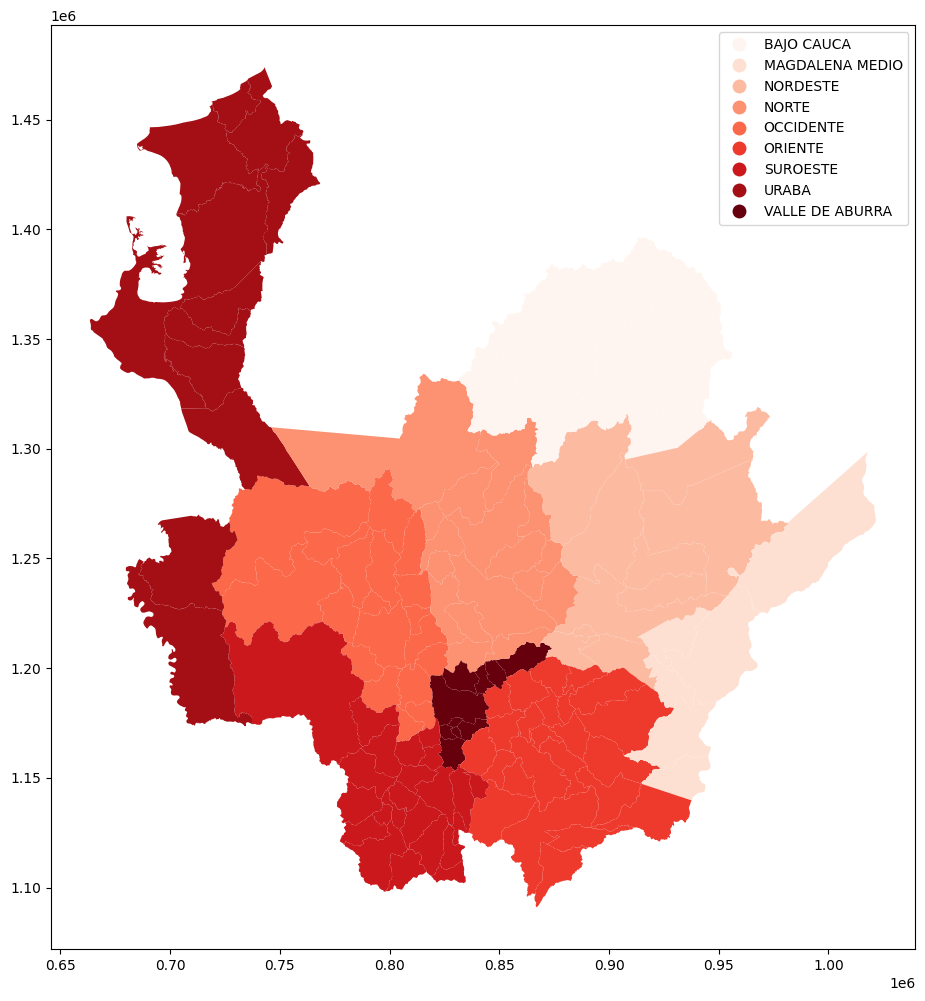

In [239]:
mapa_con_sensores.plot(column='SUBREGION', cmap='Reds', legend=True, figsize=(20, 12))

# MAPA DE PRECIPITACIONES VALORES

In [240]:
df_Sensores.head(1)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
3123,23085270,AEROPUERTO J.M. CORDOVA - AUT [23085270],6.168611,-75.426111,2131,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,ANTIOQUIA,RIONEGRO,27/11/2006 00:00,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,2023-01-01,0.0,50,NaN,900


<Axes: >

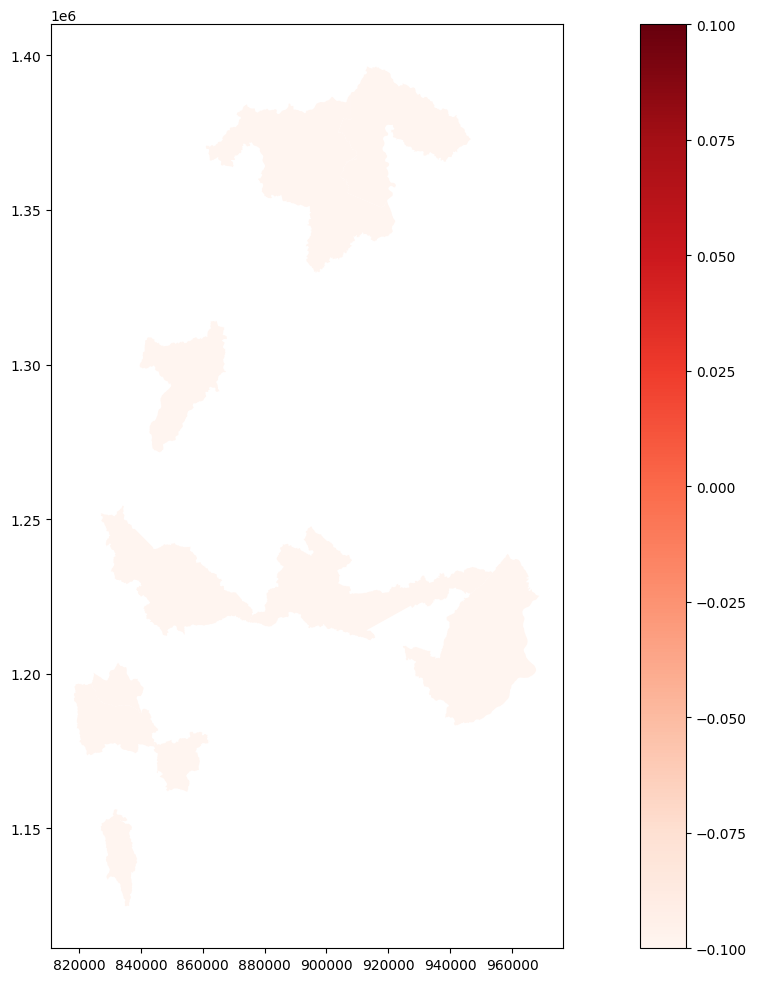

In [241]:
mapa_con_sensores.plot(column='Valor', cmap='Reds', legend=True, figsize=(20, 12))

In [242]:

# # # # Convertir la columna 'fecha' a datetime
# # # df_Sensores['Fecha'] = pd.to_datetime(df_Sensores['Fecha'])

# # # # Ahora puedes acceder al atributo .dt
# # # fechas_unicas = df_Sensores['Fecha'].dt.year.unique()
# # # año_busqueda = 2023
# # # df_Sensores = df_Sensores[df_Sensores['Fecha'].dt.year == año_busqueda]
print (df_Sensores.head(10))

      CodigoEstacion                            NombreEstacion   Latitud   Longitud  Altitud            Categoria                                            Entidad                        AreaOperativa Departamento Municipio  FechaInstalacion FechaSuspension    IdParametro    Etiqueta                         DescripcionSerie Frecuencia      Fecha   Valor  Grado  Calificador  NivelAprobacion
3123        23085270  AEROPUERTO J.M. CORDOVA - AUT [23085270]  6.168611 -75.426111     2131  Sinóptica Principal  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...  Area Operativa 01 - Antioquia-Chocó    ANTIOQUIA  RIONEGRO  27/11/2006 00:00             NaN  PRECIPITACION  PT_10_TT_D  Precipitación total diaria (automática)     Diaria 2023-01-01   0.000     50          NaN              900
3124        23085270  AEROPUERTO J.M. CORDOVA - AUT [23085270]  6.168611 -75.426111     2131  Sinóptica Principal  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...  Area Operativa 01 - Antioquia-Chocó    ANTIOQU